In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler,OneHotEncoder

C:\Users\Hp\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
RavdessData="C:\\Users\\Hp\\SER\\Audio_Speech_Actors_01-24\\"

In [4]:
ravdir=os.listdir(RavdessData)
paths = []
labels = []
for dir in ravdir:
    actor=os.listdir(RavdessData+dir)
    for filename in actor:
        label = filename.split('.')[0]
        label = label.split('-')
        labels.append(int(label[2]))
        paths.append(RavdessData+dir+'/'+filename)
paths=pd.DataFrame(paths,columns=['Path'])
labels=pd.DataFrame(labels,columns=['Emotions'])


In [5]:
Ravdess_df=pd.concat([labels,paths],axis=1)

In [6]:
Ravdess_df.head()

,Emotions,Path
0,1,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...
1,1,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...
2,1,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...
3,1,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...
4,2,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...


In [7]:
Ravdess_df.shape

(1440, 2)

In [8]:
Ravdess_df.Emotions.replace({1:'neutral',
  2:'calm',
  3:'happy',
  4:'sad',
  5:'angry',
  6:'fearful',
  7:'disgust',
  8:'surprised'},inplace=True)

Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...
1,neutral,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...
2,neutral,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...
3,neutral,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...
4,calm,C:\Users\Hp\SER\Audio_Speech_Actors_01-24\Acto...


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


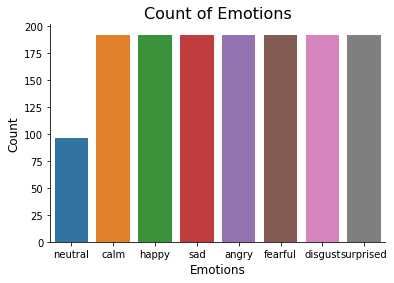

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count',size=12)
plt.xlabel('Emotions',size=12)
sns.despine(top=True , right=True,left=False,bottom=False)
plt.show()

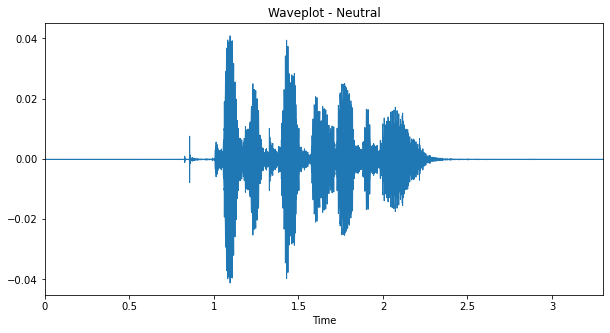

In [10]:
import librosa.display
x, sr = librosa.load('C:\\Users\\Hp\\SER\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-01-01-01-01-01.wav')
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Neutral')
Audio(data=x, rate=sr)

In [11]:
path=np.array(Ravdess_df.Path)[1]
data,samplerate=librosa.load(path)

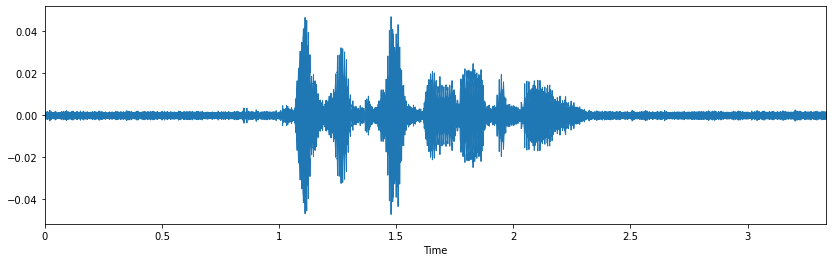

In [42]:
def noise(data):
    noiseamp=0.035*np.random.uniform()*np.amax(data)
    data=data + noiseamp*np.random.normal(size=data.shape[0])
    return data

x=noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x,sr=samplerate)
Audio(x,rate=samplerate)

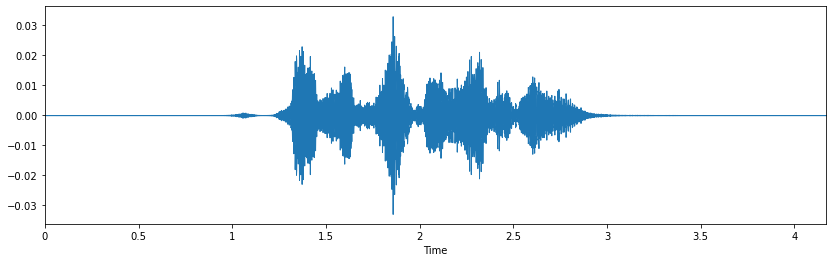

In [13]:
def stretch(data , rate=0.8):
    return librosa.effects.time_stretch(data,rate)

x=stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x,sr=samplerate)
Audio(x,rate=samplerate)

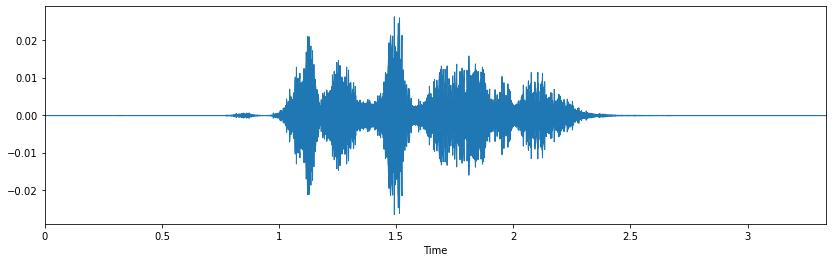

In [41]:
def pitch(data,samplingrate,pitchfactor=0.7):
    return librosa.effects.pitch_shift(data,samplingrate,pitchfactor)

x=pitch(data,samplerate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x,sr=samplerate)
Audio(x,rate=samplerate)

In [15]:
y, sr = librosa.load('C:\\Users\\Hp\\SER\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-03-02-02-01-01.wav')
librosa.feature.melspectrogram(y=y, sr=sr)

array([[2.0042801e-09, 9.2980228e-09, 8.7665990e-09, ..., 6.2821911e-08,
        9.1667587e-08, 6.7089069e-08],
       [5.1416222e-09, 1.8830786e-08, 1.1471829e-08, ..., 1.7325941e-07,
        2.0590628e-07, 1.8874292e-07],
       [2.7240794e-09, 9.1643164e-09, 8.7001597e-09, ..., 8.7524654e-08,
        1.3418841e-07, 8.5977035e-08],
       ...,
       [1.5096575e-10, 5.7257260e-10, 4.3616172e-10, ..., 9.5050690e-10,
        7.6361867e-10, 1.1616699e-09],
       [9.9767743e-11, 1.3223771e-10, 6.0853871e-11, ..., 2.8481498e-10,
        3.1723585e-10, 8.1061102e-10],
       [1.1738474e-11, 1.0812513e-11, 2.8027877e-12, ..., 3.9727728e-11,
        4.7391674e-11, 3.7100482e-11]], dtype=float32)

In [16]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)

In [17]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

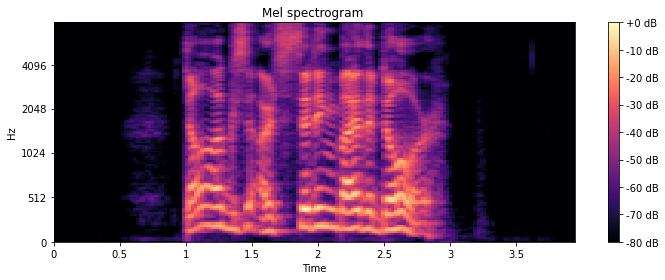

In [18]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram ')
plt.tight_layout()

In [19]:
y, sr = librosa.load('C:\\Users\\Hp\\SER\\Audio_Speech_Actors_01-24\\Actor_01\\03-01-03-02-02-01-01.wav')
librosa.feature.chroma_stft(y=y, sr=sr)

array([[0.95637673, 0.95807165, 0.81876343, ..., 0.6552888 , 0.5764139 ,
        0.605813  ],
       [0.7902508 , 1.        , 1.        , ..., 0.64609   , 0.53208005,
        0.5580503 ],
       [0.72083384, 0.88738483, 0.8933029 , ..., 0.58903533, 0.47279054,
        0.4685481 ],
       ...,
       [0.7836447 , 0.8136224 , 0.6778985 , ..., 0.80205816, 0.6002443 ,
        0.7624793 ],
       [0.7341074 , 0.81245184, 0.7801042 , ..., 0.8598048 , 0.7390257 ,
        0.96192   ],
       [1.        , 0.8384423 , 0.6682516 , ..., 0.7141168 , 0.6974844 ,
        1.        ]], dtype=float32)

In [20]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)

In [21]:
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[1.        , 0.90795463, 0.8005065 , ..., 0.38291046, 0.58019775,
        0.60704607],
       [0.98558724, 1.        , 1.        , ..., 0.22248957, 0.42017493,
        0.56428176],
       [0.90140796, 0.8620641 , 0.9587215 , ..., 0.22015467, 0.37052193,
        0.49695036],
       ...,
       [0.812468  , 0.753155  , 0.85264826, ..., 0.3181993 , 0.48450938,
        0.745214  ],
       [0.8212607 , 0.76427   , 0.95769536, ..., 0.40147367, 0.8180752 ,
        1.        ],
       [0.9888835 , 0.79499024, 0.72635144, ..., 0.4725537 , 0.8497324 ,
        0.8781614 ]], dtype=float32)

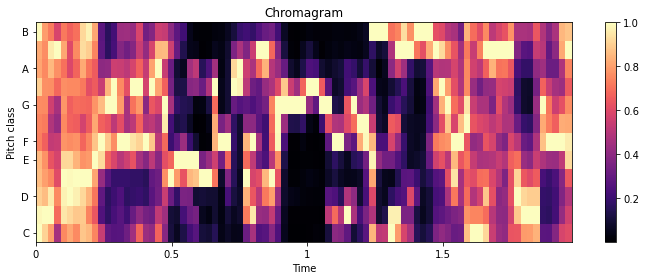

In [22]:

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [23]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [24]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [25]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\Hp\\SER\\Audio_Speech_Actors_01-24\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    for file in glob.glob("C:\\Users\\Hp\\SER\\Audio_Song_Actors_01-24\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [43]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.3)

In [44]:
x_train

array([[-5.24729858e+02,  9.27635193e+01, -1.88238583e+01, ...,
         4.82205394e-07,  6.45429949e-08,  1.09348974e-08],
       [-6.93675659e+02,  7.14265289e+01, -1.66683209e+00, ...,
         2.18338592e-08,  7.12970794e-09,  6.43362696e-09],
       [-5.81484131e+02,  8.65217514e+01, -7.02241278e+00, ...,
         2.17009685e-07,  2.78915664e-08,  7.74944553e-09],
       ...,
       [-5.77554626e+02,  3.10377235e+01, -8.84493351e+00, ...,
         5.73950911e-06,  4.80759070e-07,  7.64806174e-09],
       [-5.83483521e+02,  6.39291496e+01,  4.79147959e+00, ...,
         1.56271722e-06,  1.66769823e-07,  9.66679714e-09],
       [-5.47501343e+02,  6.37898140e+01, -1.20945683e+01, ...,
         1.88953516e-06,  1.44049494e-07,  9.29219812e-09]])

In [45]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(924, 396)


In [46]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [47]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [48]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [49]:
#Predict for the test set
y_pred=model.predict(x_test)

In [50]:
y_pred

array(['fearful', 'happy', 'disgust', 'fearful', 'calm', 'calm', 'happy',
       'fearful', 'fearful', 'calm', 'fearful', 'calm', 'calm', 'fearful',
       'calm', 'happy', 'happy', 'happy', 'calm', 'happy', 'disgust',
       'fearful', 'disgust', 'disgust', 'fearful', 'calm', 'fearful',
       'happy', 'fearful', 'happy', 'calm', 'happy', 'fearful', 'happy',
       'happy', 'calm', 'fearful', 'happy', 'fearful', 'calm', 'fearful',
       'fearful', 'fearful', 'fearful', 'fearful', 'calm', 'happy',
       'happy', 'happy', 'fearful', 'calm', 'happy', 'fearful', 'fearful',
       'disgust', 'fearful', 'happy', 'disgust', 'fearful', 'calm',
       'disgust', 'disgust', 'happy', 'calm', 'calm', 'fearful', 'calm',
       'fearful', 'happy', 'fearful', 'happy', 'fearful', 'happy',
       'fearful', 'happy', 'disgust', 'disgust', 'calm', 'happy',
       'fearful', 'disgust', 'disgust', 'calm', 'disgust', 'happy',
       'fearful', 'fearful', 'calm', 'disgust', 'happy', 'happy',
       'fearf

In [51]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 76.77%


In [57]:
from sklearn.metrics import accuracy_score, f1_score

In [59]:
from sklearn.metrics import classification_report
print("Classification Report: {}".format(classification_report(y_test, y_pred)))

Classification Report:               precision    recall  f1-score   support

        calm       0.87      0.72      0.78       127
     disgust       0.64      0.68      0.66        63
     fearful       0.77      0.84      0.80       101
       happy       0.75      0.81      0.78       105

    accuracy                           0.77       396
   macro avg       0.76      0.76      0.76       396
weighted avg       0.77      0.77      0.77       396



In [61]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,fearful,fearful
1,happy,happy
2,disgust,disgust
3,fearful,fearful
4,calm,calm
5,calm,calm
6,happy,happy
7,fearful,fearful
8,fearful,fearful
9,calm,calm


In [69]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.78448276, 0.66153846, 0.80188679, 0.77981651])

In [55]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [56]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("C:\\Users\\Hp\\SER\\Audio_Speech_Actors_01-24\\Actor_08\\03-01-06-01-02-02-08.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['fearful'], dtype='<U7')